## YouTube Video Summarizer Using Whisper and LangChain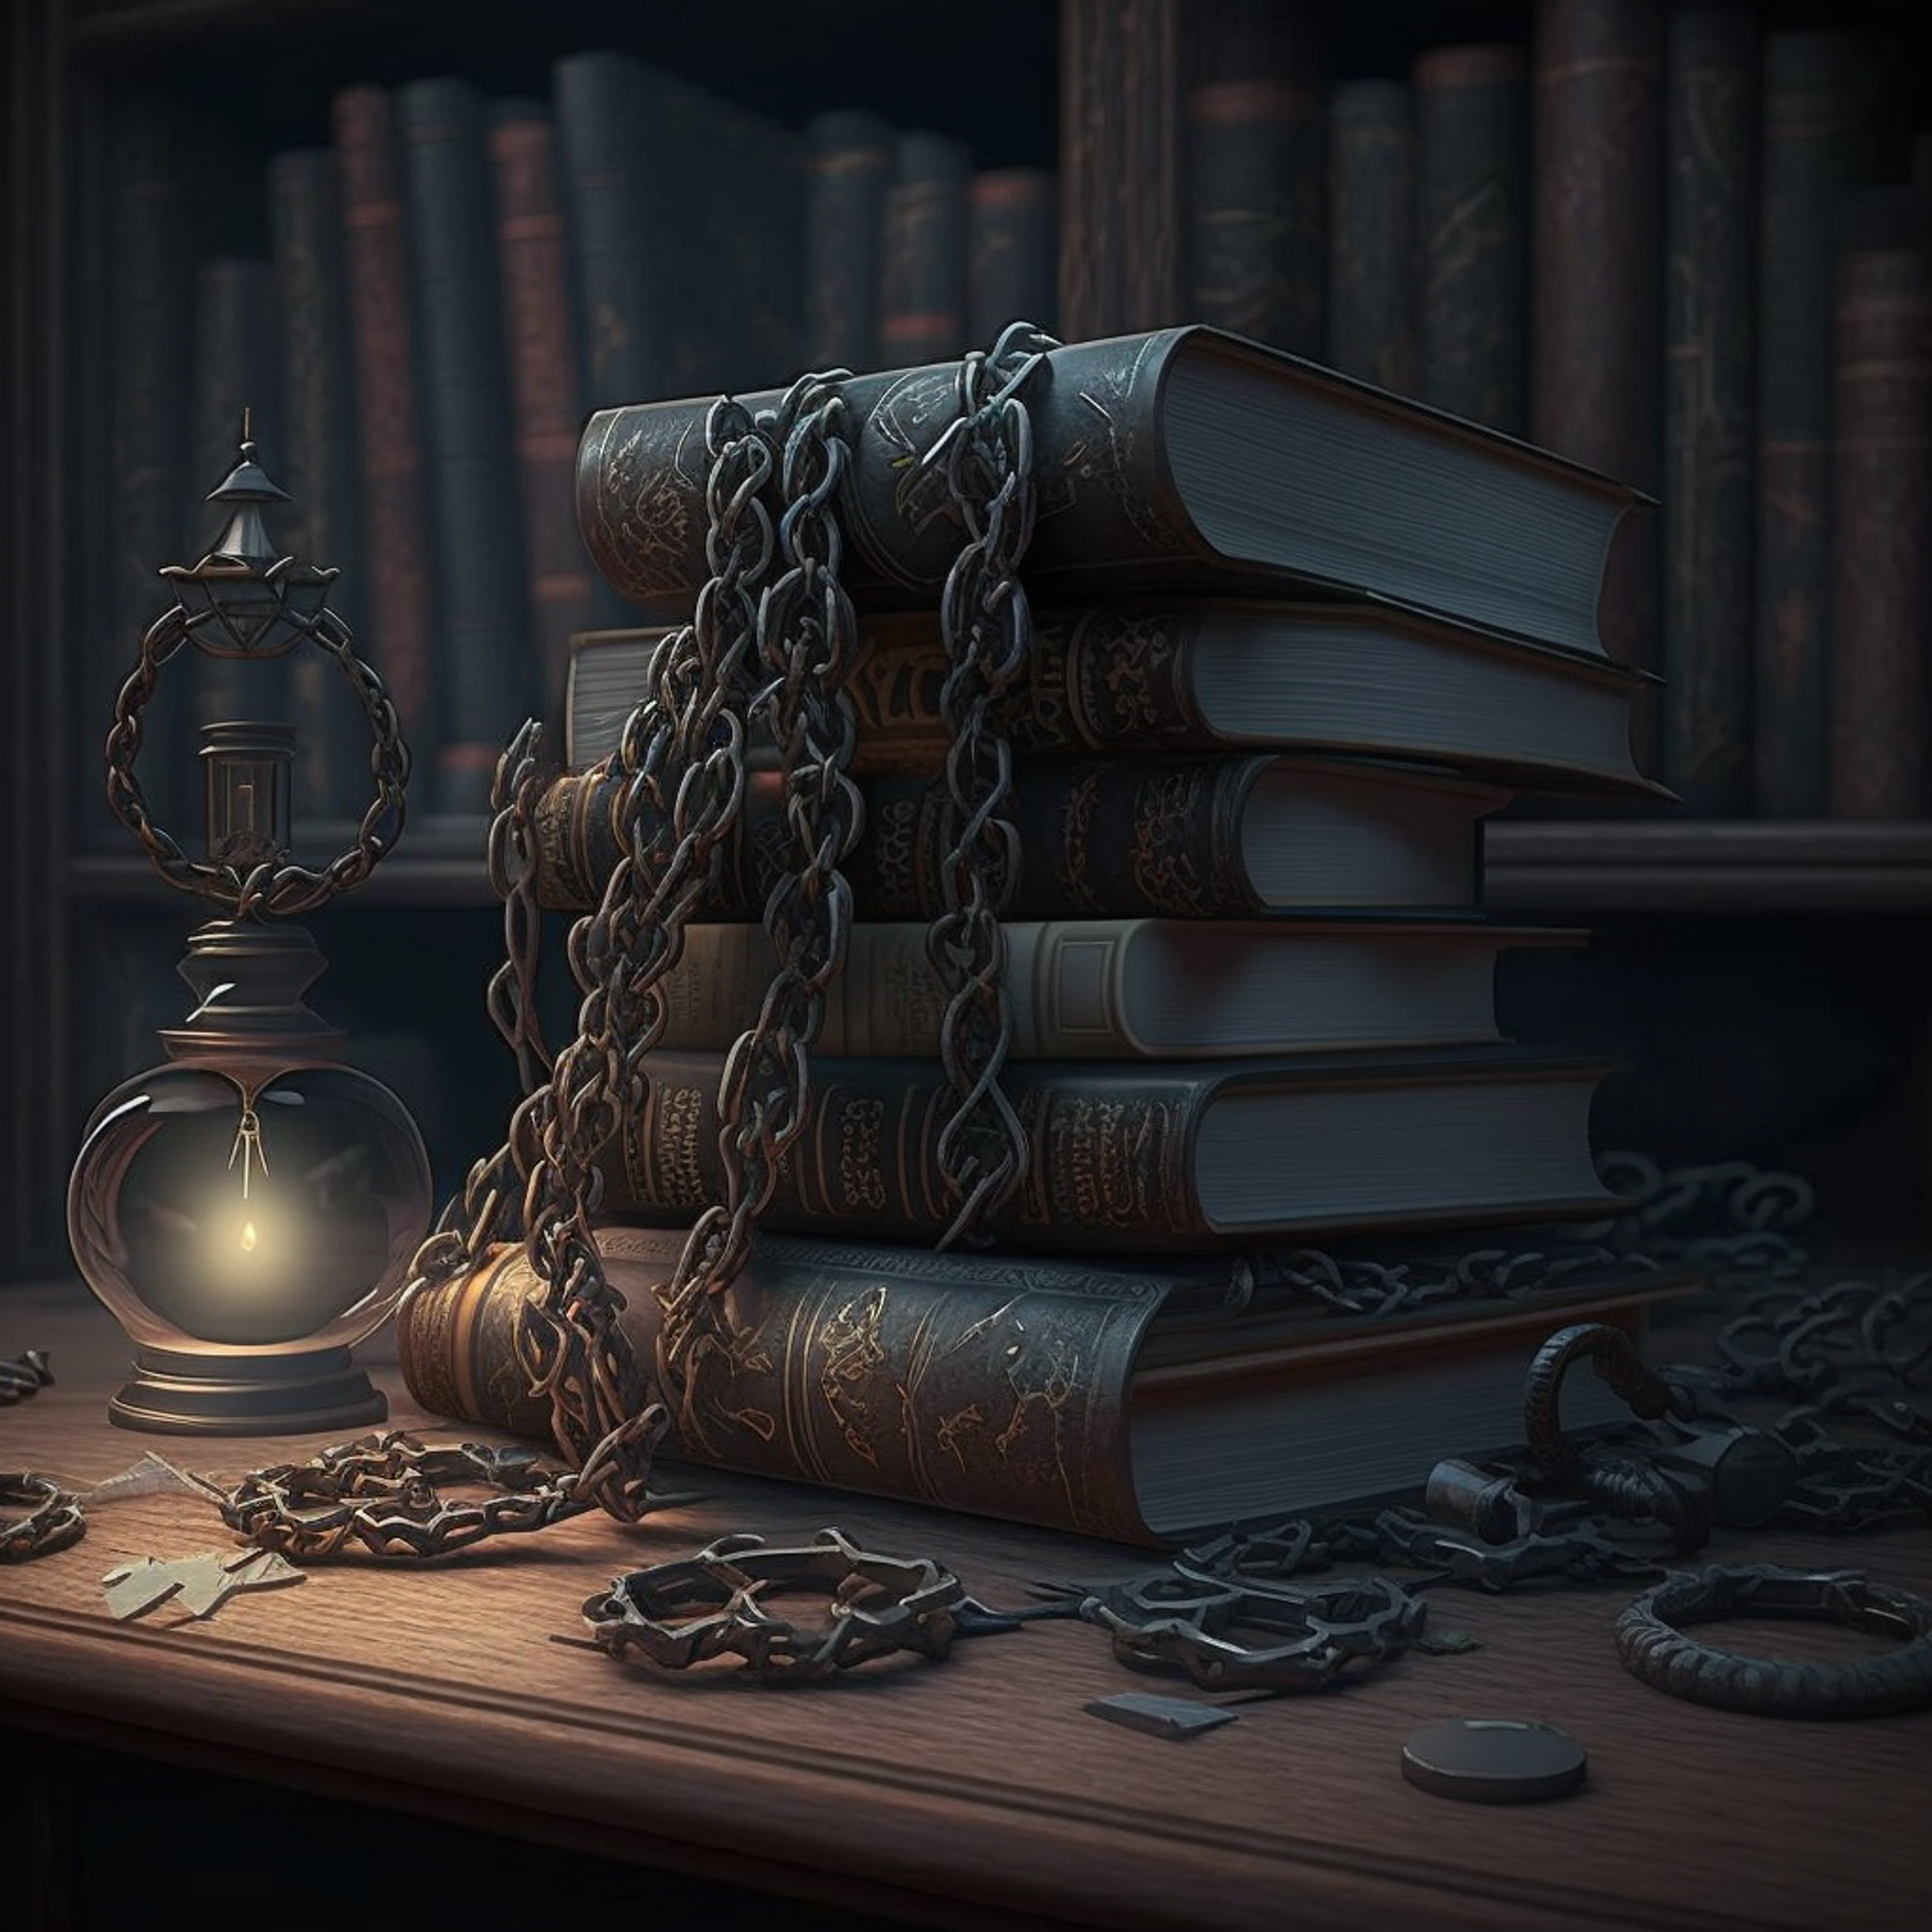

In [41]:
!pip install -q langchain==0.0.208 deeplake openai==0.27.8 tiktoken

In [2]:
!pip install -q yt_dlp
!pip install -q git+https://github.com/openai/whisper.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 94.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
import os

os.environ['OPENAI_API_KEY']="sk-"
os.environ['ACTIVELOOP_TOKEN']="..-"

In [4]:
import yt_dlp

def download_mp4_from_youtube(url):
  filename = "aliabdal.mp4"
  ydl_opts = {
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]',
        'outtmpl': filename,
        'quiet': True,
  }

  with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    result = ydl.extract_info(url,download=True)

url="https://www.youtube.com/watch?v=URjkjY6iZxo"
download_mp4_from_youtube(url)

In [5]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("aliabdal.mp4")

result['text']

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 116MiB/s]


" Whatever life's throwing at you, I ask people, look in the mirror and say, Geneleave by my values today. I'm my proud of the person that sat in front of me. Then to the day, go out and just look at the sky and be happy. You know, don't get so heavy that you're so unilittical, you strangle yourself. That's counterproductive. In this episode of Deep Dive, I joined by Professor Steve Peters. Steve is a world-renowned psychiatrist who's dedicated himself to understanding how the human mind works. He's worked with elite athletes like the Olympic cyclists, Sir Chris Hoy and Victoria Pendleton, five times nuke a world champion, Ronnie O'Sullivan, as well as the ingot football team, to help them overcome mental barriers and optimize their performance. My job is to help you to understand how your mind is functioning, what will work best for you, but your job to try out and do the work and get the emotional skills. My job is to mentor you with that. And he's perhaps best known for his first bo

In [6]:
with open("text.txt",'w') as file:
  file.write(result['text'])

In [7]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain

from langchain.chains.mapreduce import MapReduceChain
from langchain.prompts import PromptTemplate
from langchain.chains.summarize import load_summarize_chain


llm = OpenAI(model_name="text-davinci-003",temperature=0)

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=0,
    separators=[" ",",","\n"]
)

In [9]:
from langchain.docstore.document import Document

with open('text.txt') as f:
  text = f.read()

texts = text_splitter.split_text(text)
docs = [Document(page_content=t) for t in texts[:4]]

In [10]:
print(docs)

[Document(page_content="Whatever life's throwing at you, I ask people, look in the mirror and say, Geneleave by my values today. I'm my proud of the person that sat in front of me. Then to the day, go out and just look at the sky and be happy. You know, don't get so heavy that you're so unilittical, you strangle yourself. That's counterproductive. In this episode of Deep Dive, I joined by Professor Steve Peters. Steve is a world-renowned psychiatrist who's dedicated himself to understanding how the human mind works. He's worked with elite athletes like the Olympic cyclists, Sir Chris Hoy and Victoria Pendleton, five times nuke a world champion, Ronnie O'Sullivan, as well as the ingot football team, to help them overcome mental barriers and optimize their performance. My job is to help you to understand how your mind is functioning, what will work best for you, but your job to try out and do the work and get the emotional skills. My job is to mentor you with that. And he's perhaps best 

In [11]:
print(len(docs))

4


In [12]:
from langchain.chains.summarize import load_summarize_chain
import textwrap

chain = load_summarize_chain(llm,chain_type="map_reduce")

output_summary = chain.run(docs)
wrapped_text = textwrap.fill(output_summary,width=100)
print(wrapped_text)

 In this episode of Deep Dive, Professor Steve Peters, a world-renowned psychiatrist, is
interviewed. He encourages people to look in the mirror and be proud of themselves. The Chimper
Paradox is a book that has sold millions of copies worldwide and presents a mind management model.
Trading 212 is a free app that allows users to invest in stocks, shares, and funds without
commission. It has features such as pies and auto-invest. A platform has been created that allows
users to research and create a pie of investments, which can then be copied and pasted into their
own account.


In [13]:
print(chain.llm_chain.prompt.template)

Write a concise summary of the following:


"{text}"


CONCISE SUMMARY:


In [16]:
prompt_template = """Write a concise bullet point summary of the following:


{text}


CONSCISE SUMMARY IN BULLET POINTS:"""


BULLET_POINT_PROMPT = PromptTemplate(template=prompt_template,
                        input_variables=["text"])

In [17]:
chain = load_summarize_chain(
    llm,
    chain_type="stuff",
    prompt=BULLET_POINT_PROMPT
)

output_summary = chain.run(docs)

wrapped_text = textwrap.fill(
    output_summary,
    width=1000,
    break_long_words=False,
    replace_whitespace=False
)

print(wrapped_text)


• Professor Steve Peters is a world-renowned psychiatrist who has worked with elite athletes to help them overcome mental barriers and optimize their performance. 
• His book, The Chimp Paradox, presents a mind management model based on three fundamental forces in our brains: The Chimp, the Inner Human, and The Computer. 
• Trading 212 is a free app that lets you invest in stocks and shares and funds in a commission-free fashion. 
• Features include Pies and Auto-Invest, and Multi-Currency Accounts.


In [18]:
chain = load_summarize_chain(llm,chain_type="refine")

output_summary = chain.run(docs)

wrapped_text = textwrap.fill(output_summary,width=100)

print(wrapped_text)

  In this episode of Deep Dive, Professor Steve Peters, a world-renowned psychiatrist, is
interviewed. He has worked with elite athletes to help them overcome mental barriers and optimize
their performance. He encourages people to look in the mirror and be proud of themselves, and to not
get so heavy that they strangle themselves. His job is to mentor people to understand how their
minds are functioning and what will work best for them. He is the author of the book, The Chimper
Paradox, which has sold millions of copies all around the world. The Chimper paradox presents a mind
management model that is based around three fundamental forces in our brains: The Chimper, our inner
human, and The Computer. Peters emphasizes the importance of having a sense of humour and taking
time to reflect on life. He also encourages people to look at the bigger picture and to consider
investing in broad stock market index funds, which can be done commission-free using Trading 212.
Trading 212 is a fantas

In [19]:
import yt_dlp

def download_mp4_from_youtube(urls, job_id):
    video_info = []

    for i, url in enumerate(urls):
        file_temp = f'./{job_id}_{i}.mp4'
        ydl_opts = {
            'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]',
            'outtmpl': file_temp,
            'quiet': True,
        }

        # Download the video file
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            result = ydl.extract_info(url, download=True)
            title = result.get('title', "")
            author = result.get('uploader', "")

        # Add the title and author to our list
        video_info.append((file_temp, title, author))

    return video_info

urls = ['https://www.youtube.com/watch?v=48jlHaxZnig',
        'https://www.youtube.com/watch?v=5HINgMMTzPE',
        ]
video_details = download_mp4_from_youtube(urls,1)

In [21]:
import whisper

model = whisper.load_model("base")

results = list()
for video in video_details:
  result = model.transcribe(video[0])
  results.append(result['text'])
  print(f"Transcription for {video[0]}:\n{result['text']}\n")



Transcription for ./1_0.mp4:
 So how can we overcome procrastination? Well, it turns out that there are findings from within the addiction literature that turn out to be very powerful towards leveraging our way out of procrastination. And it has to do with this. You already know, because I've told you probably a dozen times now, that the depth of the trough after a dopamine peak is proportional to how high that peak was and how steep it was, how quickly that peak occurred. It turns out that not only is the depth of the trough proportional to that, but the rate at which you get out of that trough is proportional to how steep that trough is. Let me explain this for you in as clear terms as I possibly can. Imagine you're in an a motivated state. You're just not feeling motivated. You're procrastinating. You may think, okay, the thing to do here is something. I'll clean the house. I'll take care of some bills. I'll do something. I'll just wait. Those approaches, as we talked about before, 

In [28]:
print(results[0])
print(len(results))


 So how can we overcome procrastination? Well, it turns out that there are findings from within the addiction literature that turn out to be very powerful towards leveraging our way out of procrastination. And it has to do with this. You already know, because I've told you probably a dozen times now, that the depth of the trough after a dopamine peak is proportional to how high that peak was and how steep it was, how quickly that peak occurred. It turns out that not only is the depth of the trough proportional to that, but the rate at which you get out of that trough is proportional to how steep that trough is. Let me explain this for you in as clear terms as I possibly can. Imagine you're in an a motivated state. You're just not feeling motivated. You're procrastinating. You may think, okay, the thing to do here is something. I'll clean the house. I'll take care of some bills. I'll do something. I'll just wait. Those approaches, as we talked about before, generally don't work or at le

In [29]:
with open ('text.txt', 'w') as file:
    file.write(results[0])
    file.write(results[1])

In [30]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

with open('text.txt') as f:
  text = f.read()

texts = text_splitter.split_text(text)

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=0,
    separators=[" ", ",", "\n"]
)

In [31]:
texts = text_splitter.split_text(text)

In [32]:
from langchain.docstore.document import Document

docs = [Document(page_content=t) for t in texts[:4]]

In [33]:
from langchain.vectorstores import DeepLake
from langchain.embeddings.openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')

org = "="
dataset = "langchain_youtube"
dataset_path = f"hub://{org}/{dataset}"


db = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)
db.add_documents(docs)

Your Deep Lake dataset has been successfully created!


Creating 4 embeddings in 1 batches of size 4:: 100%|██████████| 1/1 [00:19<00:00, 19.11s/it]

Dataset(path='hub://anananantha28/langchain_youtube', tensors=['text', 'metadata', 'embedding', 'id'])

  tensor      htype      shape     dtype  compression
  -------    -------    -------   -------  ------- 
   text       text      (4, 1)      str     None   
 metadata     json      (4, 1)      str     None   
 embedding  embedding  (4, 1536)  float32   None   
    id        text      (4, 1)      str     None   


['f9def510-a883-11ee-bef9-0242ac1c000c',
 'f9def68c-a883-11ee-bef9-0242ac1c000c',
 'f9def718-a883-11ee-bef9-0242ac1c000c',
 'f9def786-a883-11ee-bef9-0242ac1c000c']

In [34]:
retriever = db.as_retriever()
retriever.search_kwargs['distance_metric']='cos'
retriever.search_kwargs['k'] = 4

In [35]:
from langchain.prompts import PromptTemplate

prompt_template = """Use the following pieces of transcripts from a video to answer the question in bullet points and summarized. If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}

Question: {question}
Summarized answer in bullter points:"""

PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

In [38]:
from langchain.chains import RetrievalQA

chain_type_kwargs = {"prompt": PROMPT}
qa = RetrievalQA.from_chain_type(llm=llm,
                                 chain_type="stuff",
                                 retriever=retriever,
                                 chain_type_kwargs=chain_type_kwargs)

print( qa.run("Summarize the mentions of google according to their AI program") )



- The dopamine system works according to what feels hard or easy in the moment.
- To overcome procrastination, one should do something that is harder than the state they are in or something that is more effortful, even painful.
- Doing something more painful does not mean doing any kind of tissue damaging or psychologically damaging behavior.


In [39]:
print( qa.run({"query":"Summarize the mentions of google according to their AI program"}) )



- The dopamine system works according to what feels hard or easy in the moment.
- To overcome procrastination, one should do something that is harder than the state they are in or something that is more effortful, even painful.
- Doing something more painful does not mean doing any kind of tissue damaging or psychologically damaging behavior.
